In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


In [8]:
(train_images,train_labels) , (test_images,test_labels) = datasets.cifar10.load_data()

In [9]:
train_images.min()

0

In [10]:
train_images.max()

255

In [13]:
# normalize pixel value b/w 0 to 1

train_images, test_images = train_images /255.0, test_images/255.0


print(train_images.max())

1.0


In [21]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

c:\Users\udbha\anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


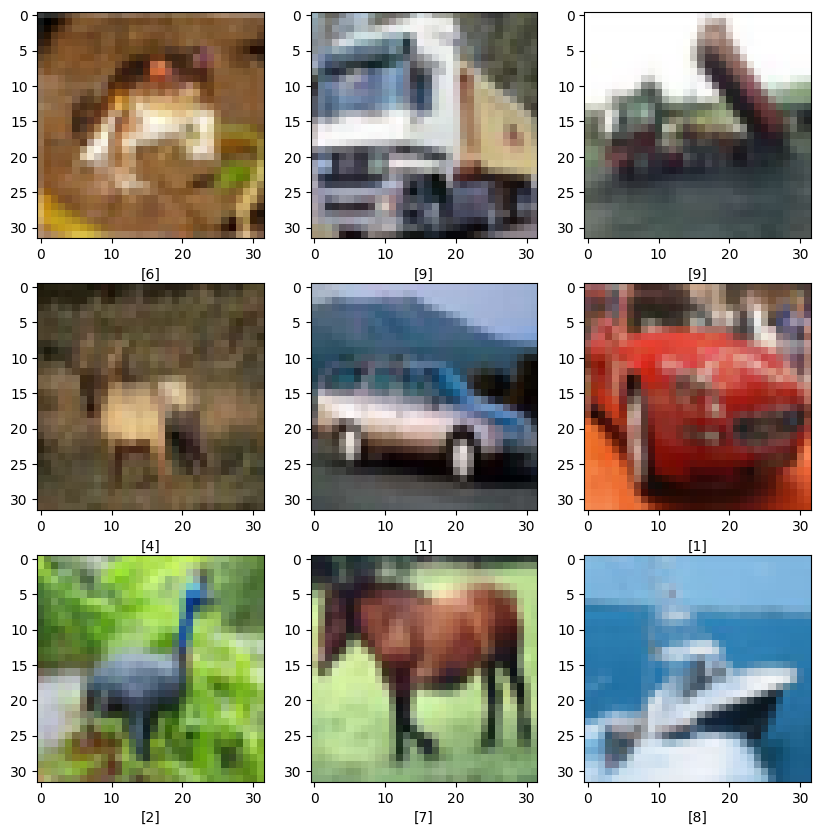

In [24]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])


In [28]:
for image in train_images:
    print(image.shape)
    break

(32, 32, 3)


In [59]:
model = models.Sequential()
# model.summary()

In [60]:

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding =  'same', strides=(2,2), activation='relu', input_shape = (32,32,3) ))
model.add(layers.MaxPool2D(pool_size= (2,2), strides=(2,2) ))
model.add(layers.Conv2D( filters=64, kernel_size=(3,3), padding='same', strides = (1,1), activation='relu' ))
model.add(layers.MaxPool2D(pool_size= (2,2), strides=(1,1) ))
model.add(layers.Conv2D( filters=64, kernel_size=(3,3), padding = 'same',strides = (1,1), activation='relu' ))



In [61]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 64)          36928     
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [63]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)              

In [64]:
model.compile(optimizer='adam', loss = 'SparseCategoricalCrossentropy',
              metrics= ['accuracy'] )

In [65]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4737 - accuracy: 0.4640
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1006 - accuracy: 0.6082
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9335 - accuracy: 0.6713
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8305 - accuracy: 0.7092
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7498 - accuracy: 0.7363
